In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv("data/manufacturing.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3957 entries, 0 to 3956
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature (°C)                3957 non-null   float64
 1   Pressure (kPa)                  3957 non-null   float64
 2   Temperature x Pressure          3957 non-null   float64
 3   Material Fusion Metric          3957 non-null   float64
 4   Material Transformation Metric  3957 non-null   float64
 5   Quality Rating                  3957 non-null   float64
dtypes: float64(6)
memory usage: 185.6 KB


In [77]:
data.head()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [78]:
data.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [79]:
data.rename(
    columns={
        'Temperature (°C)' : 'Temp',
        'Pressure (kPa)' : 'Pre',
        'Temperature x Pressure' : 'TxP',
        ' Material Fusion Metric' : 'MFM',
        'Material Transformation Metric' : 'MTM',
        'Quality Rating' : 'QR'
    },
    inplace=True
)

In [80]:
data.head()

,Temp,Pre,TxP,Material Fusion Metric,MTM,QR
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


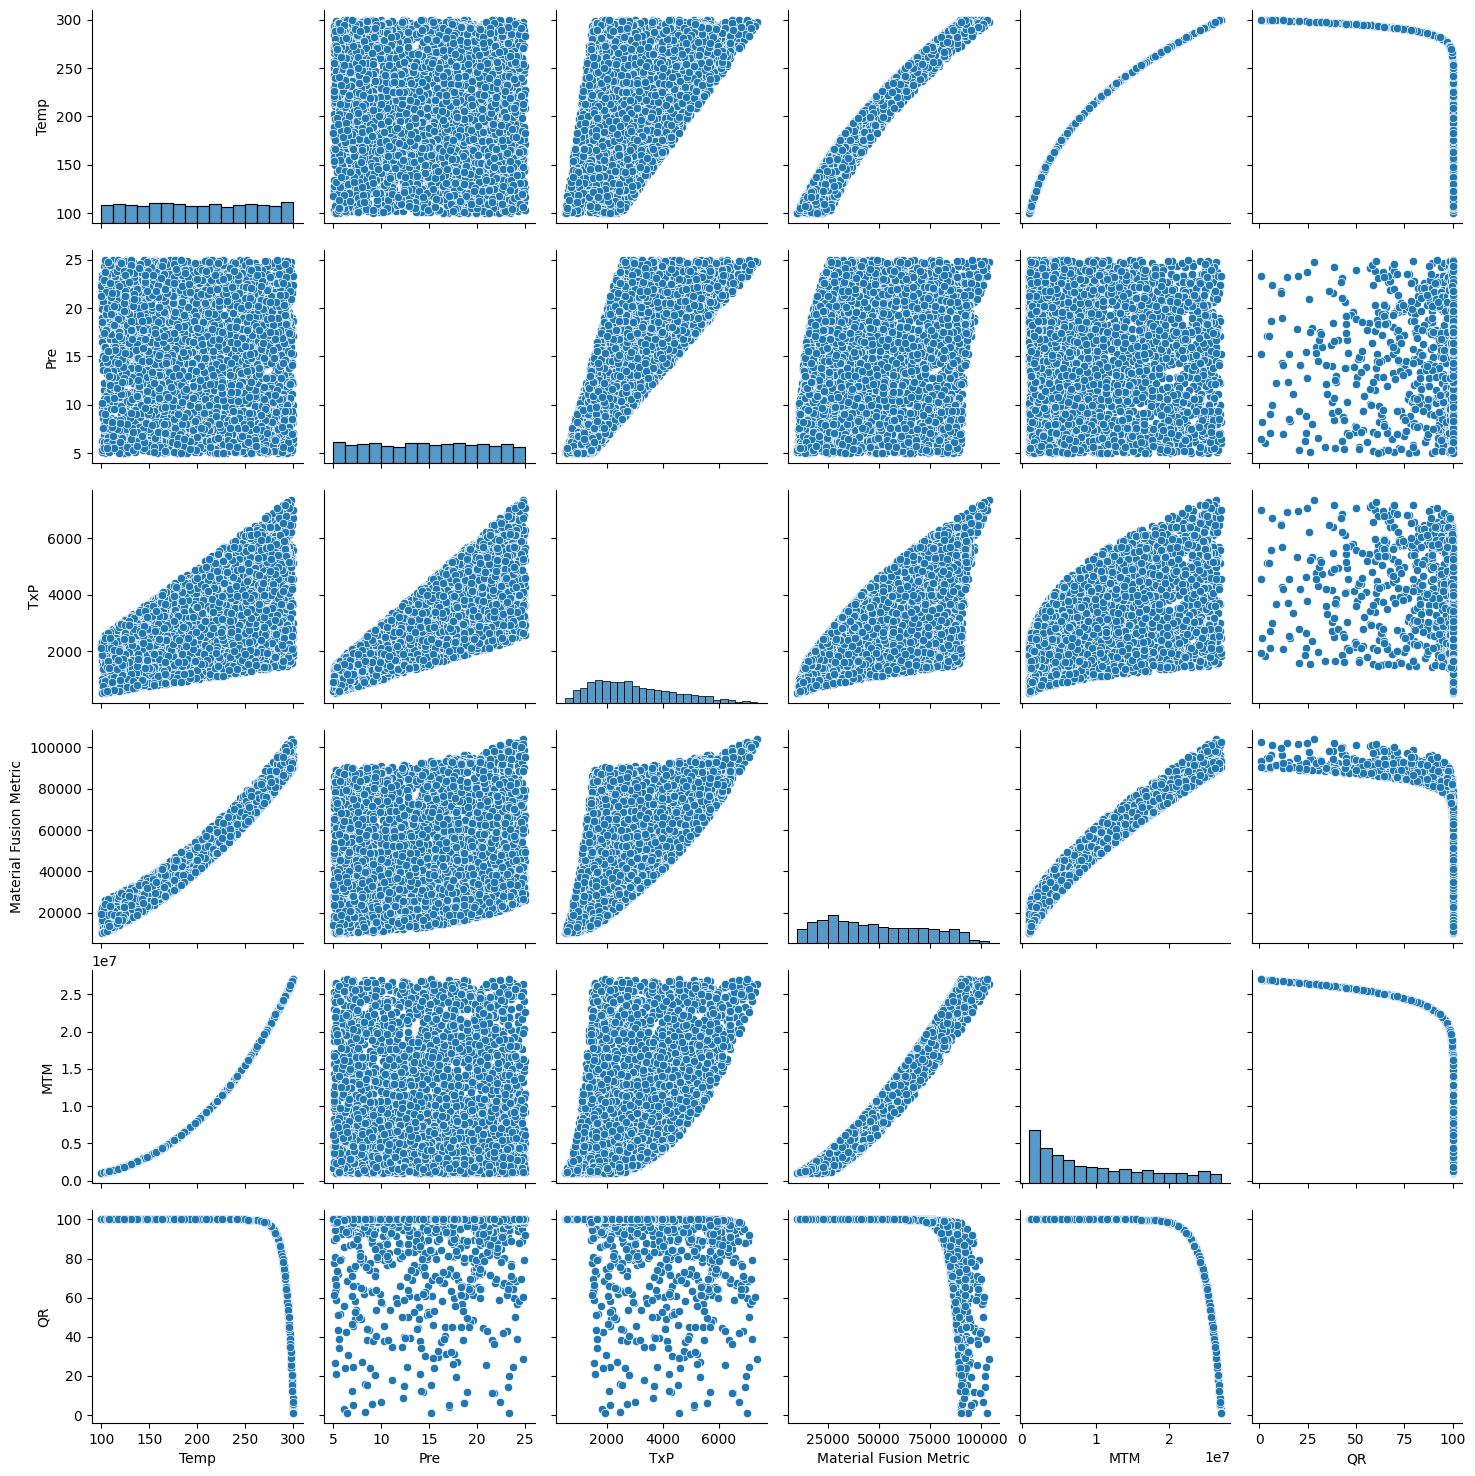

In [81]:
sns.pairplot(data)

<Axes: >

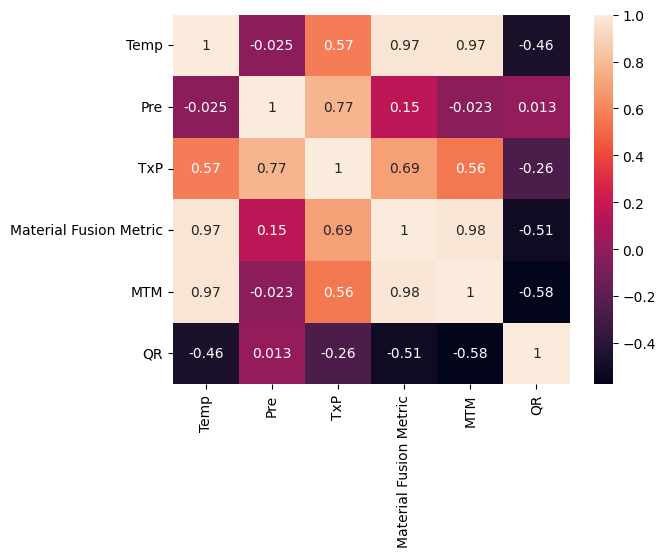

In [82]:
sns.heatmap(data.corr(),annot=True)

In [83]:
data.drop_duplicates(inplace=True)
x = data.drop(columns=['QR'])
y = data['QR']

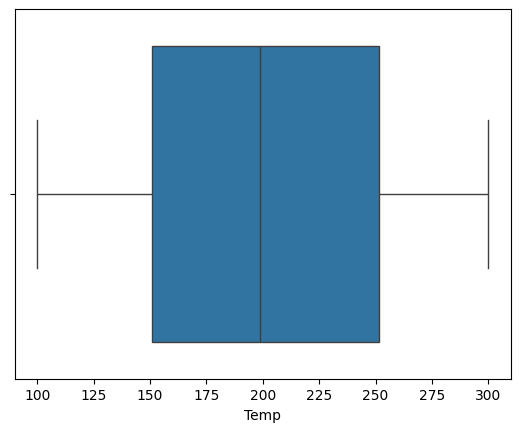

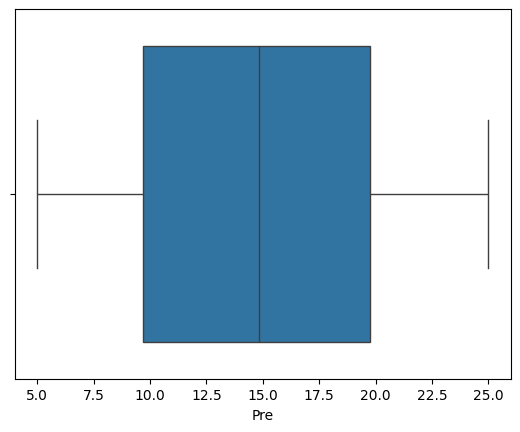

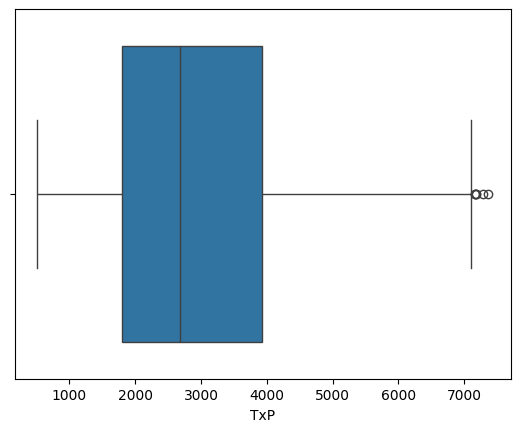

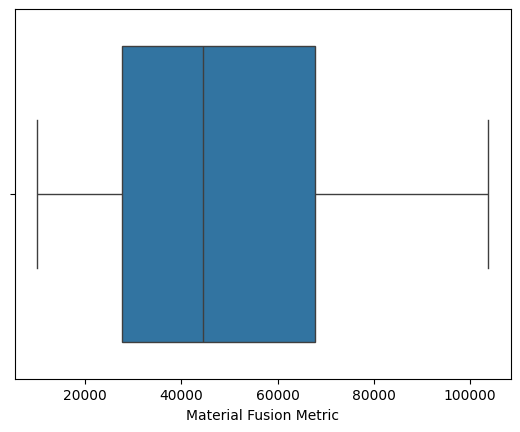

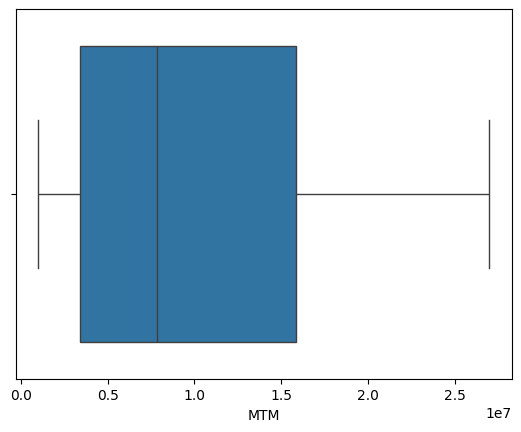

In [84]:
for col in x.columns:
    sns.boxplot(x=data[col])
    plt.show()

In [85]:
for col in x.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    x = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [87]:
x

array([[ 0.16735368, -1.17212582, -0.86866722, -0.15141061, -0.10619052,
         0.28788401],
       [ 0.73979657,  0.17266621,  0.60876914,  0.62553883,  0.56839809,
         0.28678575],
       [ 0.35297689, -1.20811856, -0.84051016,  0.04194878,  0.09106332,
         0.28786762],
       ...,
       [ 0.71088248,  0.27313592,  0.68652637,  0.61028951,  0.52946978,
         0.28706401],
       [ 0.15492496,  1.55846361,  1.38673324,  0.38089481, -0.1187642 ,
         0.28788431],
       [-0.63092614,  1.64894508,  0.69927803, -0.29546515, -0.7472026 ,
         0.28788628]])

In [88]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,  y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train = poly.fit_transform(x_train)
x_test = poly.fit_transform(x_test)

In [90]:
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [91]:
y_pred = model.predict(x_test)

In [92]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print("R2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)



R2 Score: 1.0
MAE: 1.3856480497240842e-14
MSE: 4.261203497828692e-28
